# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.683953e+01     1.330128e+01
 * time: 0.0015671253204345703
     1     3.277825e+01     7.547336e+00
 * time: 0.006206989288330078
     2     2.749633e+01     6.173857e+00
 * time: 0.011489152908325195
     3     2.174409e+01     2.207354e+00
 * time: 0.016777992248535156
     4     2.009563e+01     1.617985e+00
 * time: 0.022129058837890625
     5     1.942707e+01     1.121419e+00
 * time: 0.02746415138244629
     6     1.899311e+01     1.589123e+00
 * time: 0.03185105323791504
     7     1.871391e+01     1.316608e+00
 * time: 0.03642106056213379
     8     1.848849e+01     8.273071e-01
 * time: 0.041294097900390625
     9     1.831562e+01     6.239433e-01
 * time: 0.04606294631958008
    10     1.824728e+01     1.108757e+00
 * time: 0.04979300498962402
    11     1.816524e+01     8.133877e-01
 * time: 0.05341792106628418
    12     1.809762e+01     9.391383e-01
 * time: 0.05702805519104004
    13     1.798256e+01     6.709017e-01
 

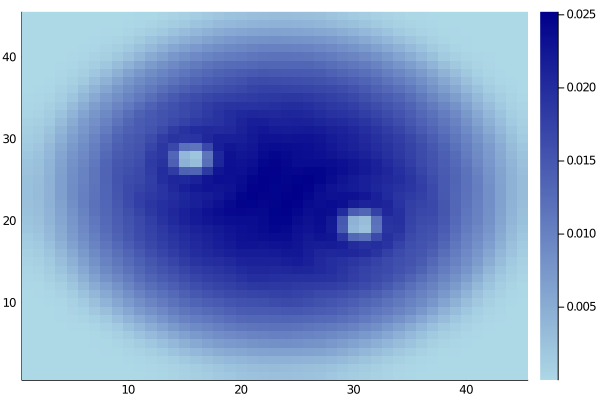

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)